<a href="https://colab.research.google.com/github/Om-Shree-0709/Pytorch/blob/main/FeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import kagglehub
path = kagglehub.dataset_download("rakeshrau/social-network-ads")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rakeshrau/social-network-ads/versions/1


In [3]:
print(path)

/root/.cache/kagglehub/datasets/rakeshrau/social-network-ads/versions/1


In [4]:
df=pd.read_csv(path+"/Social_Network_Ads.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [6]:
df1=df.iloc[:,2:]

In [8]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis=1),
                                                     df1['Purchased'],
                                                     test_size = 0.3,
                                                     random_state = 0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

Now for Scaling we will use Standard Scaler lib from sklearn library

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#fit the scalar to the train set , it will learn the parameters
sc.fit(X_train)
#Via this we store the values of mean and standard deviataion

#transform train and test sets
#we iteratively train each point in X wrt standard deviation and mean from above
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#we learn from training data but we transform both testing and training data

In [14]:
sc.mean_
#Output is array([Mean of Age , Mean of Salary])

array([3.78642857e+01, 6.98071429e+04])

Issue with this Standard Scaler is \
Input: Dataframe \
Output: Numpy Array

In [17]:
#Converting it back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled ,columns=['Age','EstimatedSalary'])
X_test_scaled = pd.DataFrame(X_test_scaled ,columns=['Age','EstimatedSalary'])

In [27]:
np.round(X_train_scaled.describe(),1)
#Now our Mean is 0 and Standard Deviation is 1

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

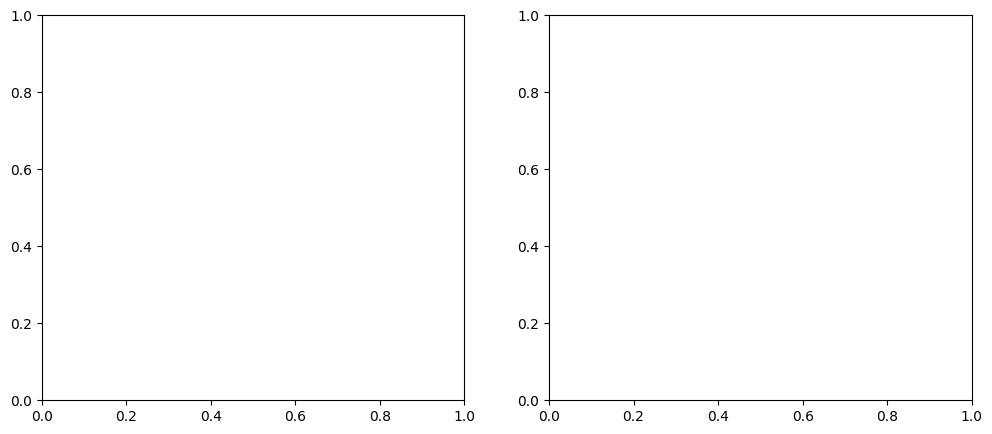

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Access the NumPy array data using .values to get numerical indices
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

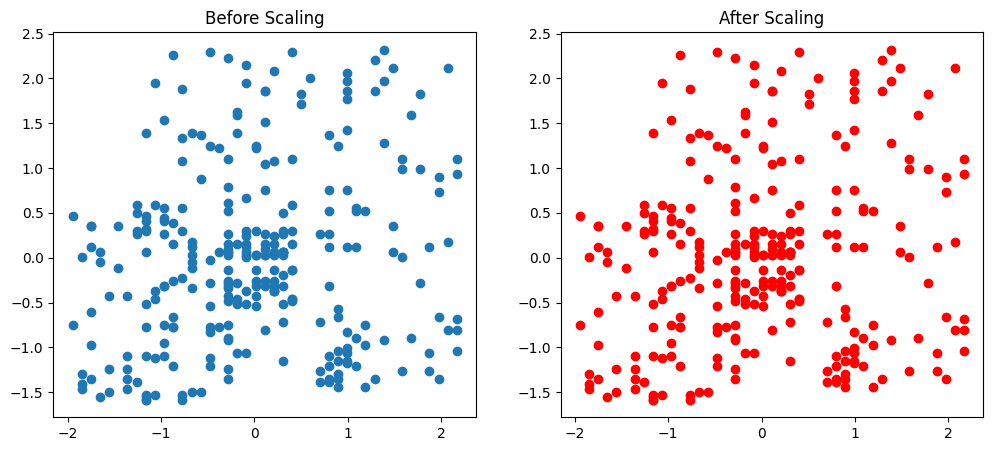

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# X_train is a NumPy array; access columns by index
ax1.scatter(X_train[:, 0], X_train[:, 1])  # Assuming 'Age' is column 0 and 'EstimatedSalary' is column 1
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

plt.show()

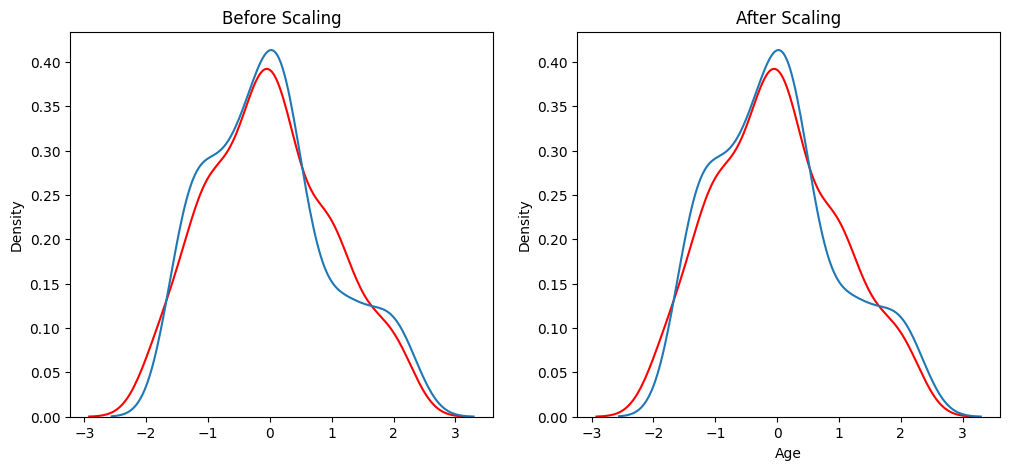

In [39]:
#Plot a PDA for the data
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train[:, 0], ax=ax1, color='red')
sns.kdeplot(X_train[:, 1], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='red')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()